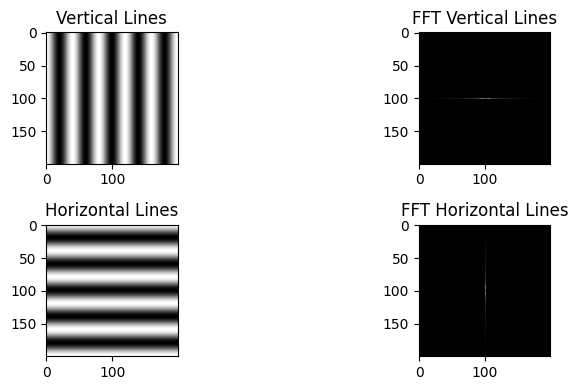

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def exercise1_basic_patterns():
    """
    Exercise 1: Basic Pattern Visualization and their Transforms

    Objective: Create simple patterns (vertical and horizontal lines) and visualize
    their Fourier transforms to understand the relationship between spatial and
    frequency domains.
    """
    # Create image with a single frequency vertical cosine pattern
    x = np.linspace(0, 2*np.pi, 200)
    y = np.linspace(0, 2*np.pi, 200)
    X, Y = np.meshgrid(x, y)
    vertical_lines = np.cos(5*X)  # 5 is the frequency

    # Create image with a single frequency horizontal cosine pattern
    horizontal_lines = np.cos(5*Y)  # 5 is the frequency

    # Calculate Fourier transforms
    ft_vertical = np.fft.fftshift(np.fft.fft2(vertical_lines))
    ft_horizontal = np.fft.fftshift(np.fft.fft2(horizontal_lines))

    # Visualize results
    plt.figure(figsize=(12, 4))

    plt.subplot(231), plt.imshow(vertical_lines, cmap='gray')
    plt.title('Vertical Lines')
    plt.subplot(232), plt.imshow(np.log(1 + np.abs(ft_vertical)), cmap='gray')
    plt.title('FFT Vertical Lines')

    plt.subplot(234), plt.imshow(horizontal_lines, cmap='gray')
    plt.title('Horizontal Lines')
    plt.subplot(235), plt.imshow(
        np.log(1 + np.abs(ft_horizontal)), cmap='gray')
    plt.title('FFT Horizontal Lines')

    plt.tight_layout()
    plt.show()


exercise1_basic_patterns()


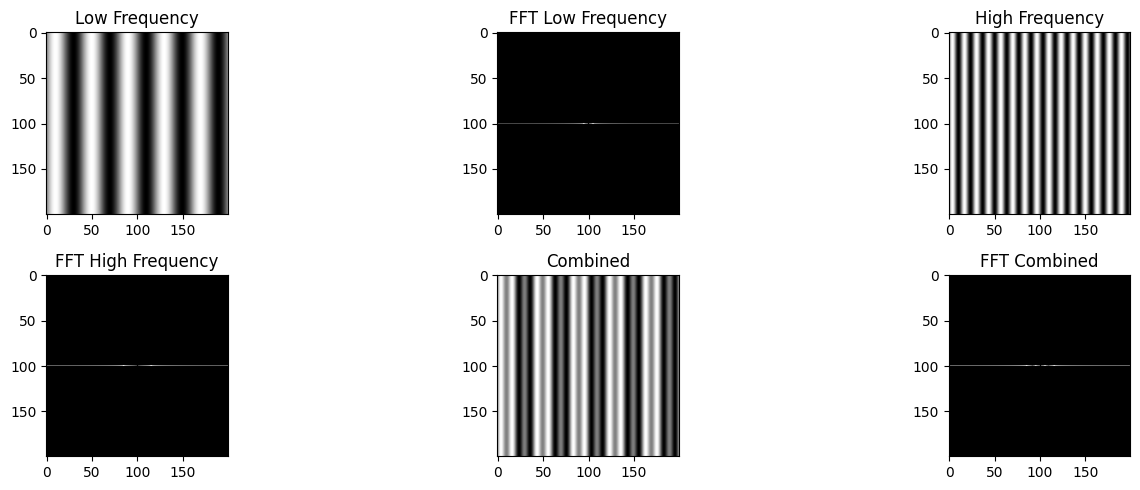

In [9]:
def exercise2_frequencies():
    """
    Exercise 2: Frequency Analysis
   
    Objective: Generate sinusoidal signals of different frequencies and observe
    how they are represented in the Fourier domain.
    """
    # Create coordinate grid
    x = np.linspace(0, 1, 200)
    y = np.linspace(0, 1, 200)
    X, Y = np.meshgrid(x, y)
   
    # Create patterns of different frequencies
    freq1 = np.sin(2 * np.pi * 5 * X)  # Low frequency
    freq2 = np.sin(2 * np.pi * 15 * X)  # High frequency
    combined = freq1 + freq2  # Combination
   
    # Calculate transforms
    ft_freq1 = np.fft.fftshift(np.fft.fft2(freq1))
    ft_freq2 = np.fft.fftshift(np.fft.fft2(freq2))
    ft_combined = np.fft.fftshift(np.fft.fft2(combined))
   
    # Visualize
    plt.figure(figsize=(15, 5))
   
    plt.subplot(231), plt.imshow(freq1, cmap='gray')
    plt.title('Low Frequency')
    plt.subplot(232), plt.imshow(np.log(1 + np.abs(ft_freq1)), cmap='gray')
    plt.title('FFT Low Frequency')
   
    plt.subplot(233), plt.imshow(freq2, cmap='gray')
    plt.title('High Frequency')
    plt.subplot(234), plt.imshow(np.log(1 + np.abs(ft_freq2)), cmap='gray')
    plt.title('FFT High Frequency')
   
    plt.subplot(235), plt.imshow(combined, cmap='gray')
    plt.title('Combined')
    plt.subplot(236), plt.imshow(np.log(1 + np.abs(ft_combined)), cmap='gray')
    plt.title('FFT Combined')
   
    plt.tight_layout()
    plt.show()

exercise2_frequencies()

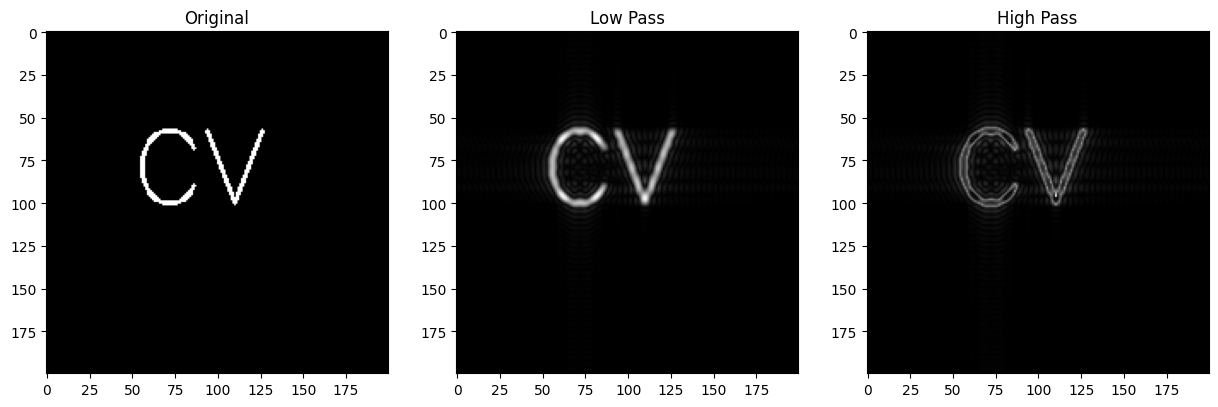

In [11]:
def exercise3_filtering():
    """
    Exercise 3: Filtering in the Fourier Domain
   
    Objective: Implement low-pass and high-pass filters in the Fourier domain
    to understand how they affect the image.
    """
    # Load image
    img = cv2.imread('image.jpg', 0)  # Load in grayscale
    if img is None:
        # Create test image if file not found
        img = np.zeros((200, 200))
        cv2.putText(img, 'CV', (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 2)
   
    # Calculate FFT
    f_transform = np.fft.fftshift(np.fft.fft2(img))
   
    # Create filter masks
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
   
    # Low-pass filter
    mask_low = np.zeros((rows, cols), np.uint8)
    r = 30
    mask_low[crow-r:crow+r, ccol-r:ccol+r] = 1
   
    # High-pass filter
    mask_high = np.ones((rows, cols), np.uint8)
    mask_high[crow-r:crow+r, ccol-r:ccol+r] = 0
   
    # Apply filters
    f_low = f_transform * mask_low
    f_high = f_transform * mask_high
   
    # Reconstruct images
    img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))
    img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))
   
    # Visualize
    plt.figure(figsize=(15, 5))
    plt.subplot(131), plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.subplot(132), plt.imshow(img_low, cmap='gray')
    plt.title('Low Pass')
    plt.subplot(133), plt.imshow(img_high, cmap='gray')
    plt.title('High Pass')
    plt.show()

exercise3_filtering()

In [ ]:
def exercise4_basic_compression(image_path, compression_ratio=0.1):
    """
    Exercise 4 - Basic Compression:
    - Comprime la imagen en el dominio de Fourier manteniendo solo un porcentaje
      de los coeficientes de mayor magnitud.
    - Compara la imagen original con la imagen reconstruida.
    
    Parámetros:
    compression_ratio: fracción de coeficientes a conservar (ej. 0.1 -> 10%)
    """
    # Cargar imagen en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: No se pudo cargar la imagen: {image_path}")
        return
    img = np.float32(img)
    
    # Transformada de Fourier
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)
    
    # Seleccionar el porcentaje de coeficientes de mayor magnitud
    magnitude = np.abs(F_shift)
    # Umbral: encontrar el valor que deja conservar sólo el porcentaje indicado
    threshold = np.percentile(magnitude, 100*(1 - compression_ratio))
    mask = magnitude >= threshold
    
    # Aplicar la compresión: mantener coeficientes significativos y eliminar el resto
    F_compressed = F_shift * mask
    img_compressed = np.fft.ifft2(np.fft.ifftshift(F_compressed))
    img_compressed = np.abs(img_compressed)
    
    # Visualización
    plt.figure(figsize=(12, 6))
    
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(np.log(1 + magnitude), cmap='gray')
    plt.title('Espectro Original')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(img_compressed, cmap='gray')
    plt.title(f'Imagen Comprimida ({int(compression_ratio*100)}%)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

exercise4_basic_compression()

In [ ]:
def exercise5_phase_magnitude_reconstruction(image1_path, image2_path):
    """
    Exercise 5 - Phase and Magnitude Reconstruction:
    - Separa la magnitud y fase de la transformada Fourier de dos imágenes.
    - Intercambia la fase de una imagen por la de la otra y reconstruye.
    - Visualiza la importancia de la fase en la reconstrucción de imágenes.
    """
    # Cargar imágenes en escala de grises
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)
    if img1 is None or img2 is None:
        print("Error: No se pudo cargar alguna de las imágenes.")
        return
    img1 = np.float32(img1)
    img2 = np.float32(img2)
    
    # Transformadas de Fourier
    F1 = np.fft.fft2(img1)
    F2 = np.fft.fft2(img2)
    
    F1_shift = np.fft.fftshift(F1)
    F2_shift = np.fft.fftshift(F2)
    
    # Separar magnitud y fase
    mag1, phase1 = np.abs(F1_shift), np.angle(F1_shift)
    mag2, phase2 = np.abs(F2_shift), np.angle(F2_shift)
    
    # Reconstruir imágenes intercambiando fase y magnitud
    # Imagen 1: magnitud de img1 y fase de img2
    F1_new = mag1 * np.exp(1j * phase2)
    F1_new_shift = np.fft.ifftshift(F1_new)
    img1_new = np.fft.ifft2(F1_new_shift)
    img1_new = np.abs(img1_new)
    
    # Imagen 2: magnitud de img2 y fase de img1
    F2_new = mag2 * np.exp(1j * phase1)
    F2_new_shift = np.fft.ifftshift(F2_new)
    img2_new = np.fft.ifft2(F2_new_shift)
    img2_new = np.abs(img2_new)
    
    # Visualización
    plt.figure(figsize=(12, 8))
    
    plt.subplot(231)
    plt.imshow(img1, cmap='gray')
    plt.title('Imagen 1 Original')
    plt.axis('off')
    
    plt.subplot(232)
    plt.imshow(np.log(1 + mag1), cmap='gray')
    plt.title('Espectro Magnitud (Img1)')
    plt.axis('off')
    
    plt.subplot(233)
    plt.imshow(phase1, cmap='gray')
    plt.title('Fase (Img1)')
    plt.axis('off')
    
    plt.subplot(234)
    plt.imshow(img2, cmap='gray')
    plt.title('Imagen 2 Original')
    plt.axis('off')
    
    plt.subplot(235)
    plt.imshow(np.log(1 + mag2), cmap='gray')
    plt.title('Espectro Magnitud (Img2)')
    plt.axis('off')
    
    plt.subplot(236)
    plt.imshow(phase2, cmap='gray')
    plt.title('Fase (Img2)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Visualización de reconstrucción con intercambio
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(img1_new, cmap='gray')
    plt.title('Img1: Mag(Img1) + Fase(Img2)')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(img2_new, cmap='gray')
    plt.title('Img2: Mag(Img2) + Fase(Img1)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


exercise5_phase_magnitude_reconstruction()

Error: No se pudo cargar la imagen: ruta/a/tu/imagen.jpg
Error: No se pudo cargar la imagen: ruta/a/tu/imagen.jpg
Error: No se pudo cargar alguna de las imágenes.


In [ ]:
"""
Two-Dimensional Wavelet Transform Example
Using PyWavelets (pywt) library to demonstrate 2D wavelet decomposition

Requirements:
pip install numpy matplotlib pywavelets
"""

import numpy as np
import matplotlib.pyplot as plt
import pywt

def create_test_image(size=256):
    """Create a test image with visible patterns"""
    img = np.zeros((size, size))
   
    # Add a large square
    img[size//4:3*size//4, size//4:3*size//4] = 1
   
    # Add some diagonal lines
    for i in range(size):
        img[i, i] = 1
        if i < size-1:
            img[i, size-i-1] = 1
   
    # Add horizontal and vertical patterns
    img[size//2, :] = 1
    img[:, size//2] = 1
   
    return img

def normalize_for_display(data):
    """Normalize data for better visualization"""
    data_min = np.min(data)
    data_max = np.max(data)
    if data_max == data_min:
        return data - data_min
    return (data - data_min) / (data_max - data_min)

def plot_coefficients(coeffs, title=''):
    """Plot wavelet coefficients"""
    # Ensure coefficients are in the right format
    if len(coeffs) == 2:
        LL, (LH, HL, HH) = coeffs
    else:
        raise ValueError("Coefficients not in the expected format")
   
    # Create a figure to display the coefficients
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle(title, fontsize=12)
   
    ax1.imshow(normalize_for_display(LL), cmap='gray')
    ax1.set_title('Approximation (LL)')
    ax1.axis('off')
   
    ax2.imshow(normalize_for_display(LH), cmap='gray')
    ax2.set_title('Horizontal Detail (LH)')
    ax2.axis('off')
   
    ax3.imshow(normalize_for_display(HL), cmap='gray')
    ax3.set_title('Vertical Detail (HL)')
    ax3.axis('off')
   
    ax4.imshow(normalize_for_display(HH), cmap='gray')
    ax4.set_title('Diagonal Detail (HH)')
    ax4.axis('off')
   
    plt.tight_layout()
    return fig

def display_wavelet_transform():
    """Main function to demonstrate wavelet transform"""
    # Create test image
    image = create_test_image(256)
   
    # Display original image
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
   
    # Perform wavelet transform
    coeffs = pywt.dwt2(image, 'db1')
   
    # Display the coefficients
    plot_coefficients(coeffs, 'Single Level Wavelet Transform')
    plt.show()
   
    # Perform multi-level wavelet transform
    coeffs_multi = pywt.wavedec2(image, 'db1', level=2)
   
    # Display multi-level results
    plt.figure(figsize=(10, 10))
    plt.imshow(normalize_for_display(pywt.coeffs_to_array(coeffs_multi)[0]), cmap='gray')
    plt.title('Multi-level Wavelet Transform')
    plt.axis('off')
    plt.show()
   
    # Reconstruct the image
    reconstructed_image = pywt.waverec2(coeffs_multi, 'db1')
   
    # Display original vs reconstructed
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
   
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
   
    ax2.imshow(normalize_for_display(reconstructed_image), cmap='gray')
    ax2.set_title('Reconstructed Image')
    ax2.axis('off')
   
    plt.show()

if __name__ == "__main__":
    display_wavelet_transform()